In [23]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

In [4]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

C:\Users\X-Note\AppData\Local\Temp\ipykernel_13288\645276314.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(people.target.shape, dtype=np.bool)


In [5]:
X_people = people.data[mask]
y_people = people.target[mask]

In [6]:
X_people = X_people / 255.
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

In [7]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블 \n{}".format(np.unique(labels)))

고유한 레이블 
[-1]


In [8]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블 \n{}".format(np.unique(labels)))
#[min_samples=3 인 경우]

고유한 레이블 
[-1]


In [9]:
dbscan = DBSCAN(min_samples=3,eps=15)
labels = dbscan.fit_predict(X_pca)
print("고유한 레이블 \n{}".format(np.unique(labels)))
#[min_samples=3, eps=15 인 경우]

고유한 레이블 
[-1  0]


클러스터 별 포인트 수: [  32 2031]


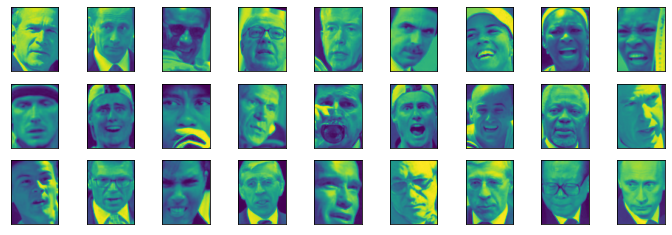

In [14]:
print("클러스터 별 포인트 수: {}".format(np.bincount(labels + 1)))
noise = X_people[labels == -1]
fig, axes = plt.subplots(3, 9, subplot_kw={'xticks':(), 'yticks':()}, figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
    ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [15]:
for eps in [1, 3, 5, 7, 9, 11, 13]:
    print("\neps={}".format(eps))
    dbscan = DBSCAN(eps=eps, min_samples=3)
    labels = dbscan.fit_predict(X_pca)    
    print("클러스터 수 {}".format(len(np.unique(labels))))
    print("클러스터 크기 {}".format(np.bincount(labels + 1)))


eps=1
클러스터 수 1
클러스터 크기 [2063]

eps=3
클러스터 수 1
클러스터 크기 [2063]

eps=5
클러스터 수 1
클러스터 크기 [2063]

eps=7
클러스터 수 14
클러스터 크기 [2004    3   14    7    4    3    3    4    4    3    3    5    3    3]

eps=9
클러스터 수 4
클러스터 크기 [1307  750    3    3]

eps=11
클러스터 수 2
클러스터 크기 [ 413 1650]

eps=13
클러스터 수 2
클러스터 크기 [ 120 1943]


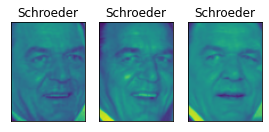

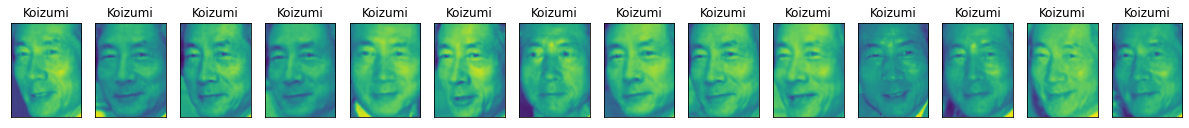

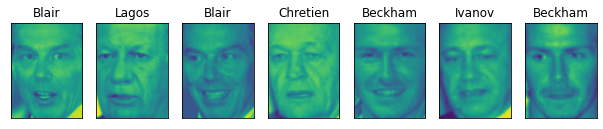

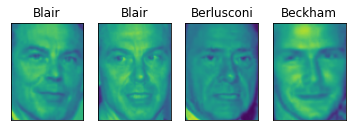

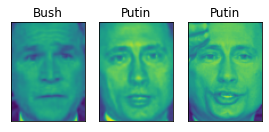

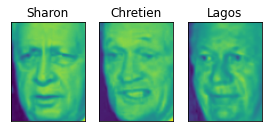

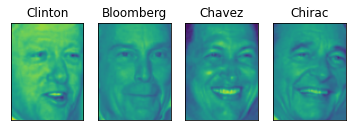

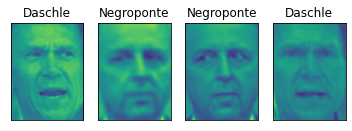

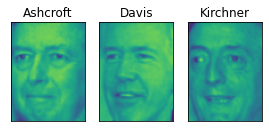

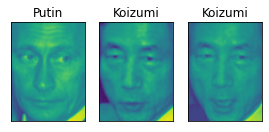

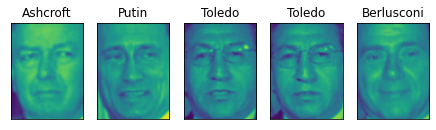

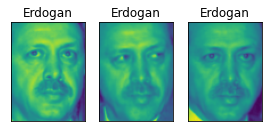

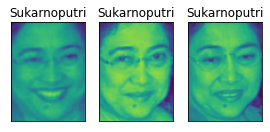

In [16]:
dbscan = DBSCAN(min_samples=3,eps=7)
labels = dbscan.fit_predict(X_pca)
for cluster in range(max(labels) + 1):
    mask = labels == cluster
    n_images = np.sum(mask)
    fig, axes = plt.subplots(1, n_images, figsize=(n_images * 1.5, 4), subplot_kw={'xticks':(), 'yticks':()})  
    for image, label, ax in zip(X_people[mask], y_people[mask], axes):
        ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)
        ax.set_title(people.target_names[label].split()[-1])

In [17]:
from sklearn.cluster import KMeans
# k-평균으로 클러스터 추출
km = KMeans(n_clusters=10, random_state=0)
labels_km = km.fit_predict(X_pca)
print("k-평균의 클러스터 크기 : {}".format(np.bincount(labels_km)))
# k-평균의 클러스터 크기 : [ 24 100  47 125  63 116 102  74   8 135]

k-평균의 클러스터 크기 : [155 175 238  75 358 257  91 219 323 172]


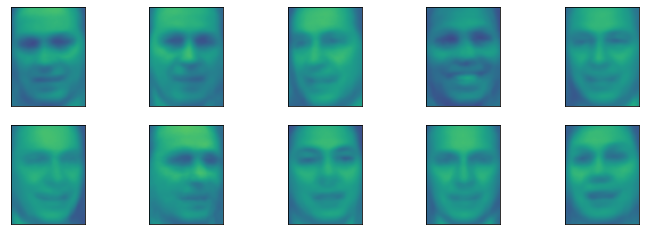

In [18]:
fig, axes = plt.subplots(2, 5, figsize=(12, 4), subplot_kw={'xticks':(), 'yticks':()})  
for center, ax in zip(km.cluster_centers_, axes.ravel()):
    ax.imshow(pca.inverse_transform(center).reshape(image_shape), vmin=0, vmax=1)

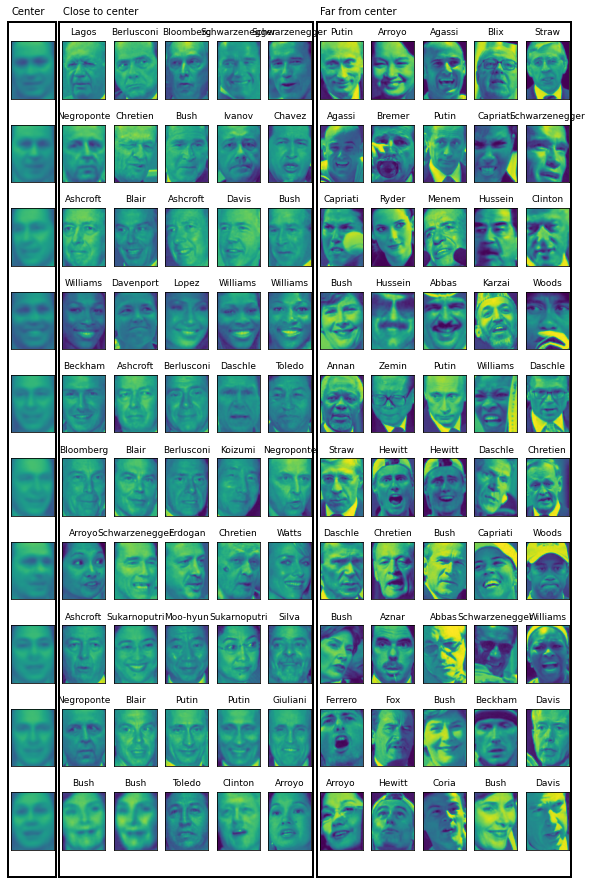

In [20]:
import mglearn
mglearn.plots.plot_kmeans_faces(km, pca, X_pca, X_people, y_people, people.target_names)

In [21]:
from sklearn.cluster import AgglomerativeClustering
# 병합 군집으로 클러스터 추출
agglomerative = AgglomerativeClustering(n_clusters=10)
labels_agg = agglomerative.fit_predict(X_pca)
print("k-평균의 클러스터 크기 : {}".format(np.bincount(labels_agg)))
# 병합 군집의 클러스터 크기 : [116   8 119 153  50 197 108   1   4  38]

k-평균의 클러스터 크기 : [169 660 144 329 217  85  18 261  31 149]


In [24]:
print("ARI : {:.2f}".format(adjusted_rand_score(labels_agg, labels_km)))
# ARI : 0.06

ARI : 0.09
